# Rossmann Pharmaceuticals

#### This script is to explore the behavior of customers in the various stores of Rossmann Pharmaceuticals and the goal is to check how some measures such as promos and the opening of new stores affect purchasing behavior. 

### Outline

1. Task 1.1 - Exploration of customer purchasing behavior
- Calculate the distribution of promotions in the training and test datasets
- Check & compare sales behavior before, during, and after holidays
- Find out any seasonal (Christmas, Easter, etc) purchase behaviors
- Correlation between sales and the number of customers
- Promo Effect on Sales
- Most Effective Stores for Promotions
- Trends of customer behavior during store opening and closing times
- Which stores are open on all weekdays? How does that affect their sales on weekends?
- Check how the assortment type affects sales
- How does the distance to the next competitor affect sales?
- How does the opening or reopening of new competitors affect stores?
2. Task 1.2 - Logging


In [61]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings
warnings.filterwarnings('ignore')

# Add the parent directory to the Python path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [75]:
from scripts.load_data import load_data
logging.info("Loading data from csv file")
df_store= load_data('../data/store.csv')
df_test=load_data('../data/test.csv')
df_train=load_data('../data/train.csv')
logging.info("Data loaded successfully")

# Merging train data with store data to analyze store-level details
merged_data = pd.merge(df_train, df_store, on='Store')


2025-01-04 22:34:21,030 - INFO - Loading data from csv file
2025-01-04 22:34:21,527 - INFO - Data loaded successfully


### Task 1 - Exploration of customer purchasing behavior

In [84]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014567 entries, 1016095 to 1114
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   Store                         1014567 non-null  int64         
 1   DayOfWeek                     1014567 non-null  int64         
 2   Date                          1014567 non-null  datetime64[ns]
 3   Sales                         1014567 non-null  int64         
 4   Customers                     1014567 non-null  int64         
 5   Open                          1014567 non-null  int64         
 6   Promo                         1014567 non-null  int64         
 7   StateHoliday                  1014567 non-null  object        
 8   SchoolHoliday                 1014567 non-null  int64         
 9   StoreType                     1014567 non-null  object        
 10  Assortment                    1014567 non-null  object        
 11  

In [85]:
# Check for missing values
merged_data.isnull().sum()

Store                                0
DayOfWeek                            0
Date                                 0
Sales                                0
Customers                            0
Open                                 0
Promo                                0
StateHoliday                         0
SchoolHoliday                        0
StoreType                            0
Assortment                           0
CompetitionDistance                  0
CompetitionOpenSinceMonth       320706
CompetitionOpenSinceYear        320706
Promo2                               0
Promo2SinceWeek                 506147
Promo2SinceYear                 506147
PromoInterval                   506147
DistanceBin                          0
previous_competitor_distance      1112
dtype: int64

### Calculate the distribution of promotions in the training and test datasets

In [63]:
# Calculate the distribution of promotions in the training and test datasets
train_promo_distribution = df_train['Promo'].value_counts(normalize=True) * 100
test_promo_distribution = df_test['Promo'].value_counts(normalize=True) * 100

# Display the distributions
print("Promotion Distribution in Training Set:")
print(train_promo_distribution)

print("\nPromotion Distribution in Test Set:")
print(test_promo_distribution)

Promotion Distribution in Training Set:
Promo
0    61.848548
1    38.151452
Name: proportion, dtype: float64

Promotion Distribution in Test Set:
Promo
0    60.416667
1    39.583333
Name: proportion, dtype: float64


### Check & compare sales behavior before, during, and after holidays


In [64]:
# Convert 'Date' column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Filter sales data
holiday_sales = df_train[df_train['StateHoliday'] != '0']  # During holidays
non_holiday_sales = df_train[df_train['StateHoliday'] == '0']  # Non-holiday days

# Calculate average sales during and non-holiday periods
holiday_avg_sales = holiday_sales['Sales'].mean()
non_holiday_avg_sales = non_holiday_sales['Sales'].mean()

# Extract day before and day after holiday sales
day_before_holiday = df_train[df_train['Date'].isin(holiday_sales['Date'] - pd.Timedelta(days=1))]
day_after_holiday = df_train[df_train['Date'].isin(holiday_sales['Date'] + pd.Timedelta(days=1))]

# Calculate averages
avg_sales_before = day_before_holiday['Sales'].mean()
avg_sales_after = day_after_holiday['Sales'].mean()

# Print the results
print(f"Average Sales During Holidays: {holiday_avg_sales}")
print(f"Average Sales Before Holidays: {avg_sales_before}")
print(f"Average Sales After Holidays: {avg_sales_after}")
print(f"Average Sales on Non-Holiday Days: {non_holiday_avg_sales}")

Average Sales During Holidays: 4684.874236685952
Average Sales Before Holidays: 5711.000981616473
Average Sales After Holidays: 6026.477729735962
Average Sales on Non-Holiday Days: 5980.279716566853


### Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

In [65]:
# Add a column to identify the month and day for seasonal analysis
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day

# Define seasons and holidays
christmas = df_train[(df_train['Month'] == 12) & (df_train['Day'] >= 20)]
easter = df_train[df_train['Date'].isin(pd.to_datetime([
    '2015-04-05', '2014-04-20', '2013-03-31'  # Approximate Easter dates
]))]

# Calculate average sales around Christmas and Easter
christmas_avg_sales = christmas['Sales'].mean()
easter_avg_sales = easter['Sales'].mean()

# Overall monthly average sales for comparison
monthly_avg_sales = df_train.groupby('Month')['Sales'].mean()

# Results
print("Seasonal Sales Analysis:")
print(f"Average Sales Around Christmas: {christmas_avg_sales}")
print(f"Average Sales During Easter: {easter_avg_sales}")
print("\nAverage Monthly Sales:")
print(monthly_avg_sales)

Seasonal Sales Analysis:
Average Sales Around Christmas: 5374.652926829268
Average Sales During Easter: 173.52107623318386

Average Monthly Sales:
Month
1     5465.395529
2     5645.253150
3     5784.578871
4     5738.866916
5     5489.639973
6     5760.964375
7     6064.915711
8     5693.016554
9     5570.246033
10    5537.037419
11    6008.111821
12    6826.611377
Name: Sales, dtype: float64


### Correlation between sales and the number of customers

Correlation between Sales and Customers: 0.895


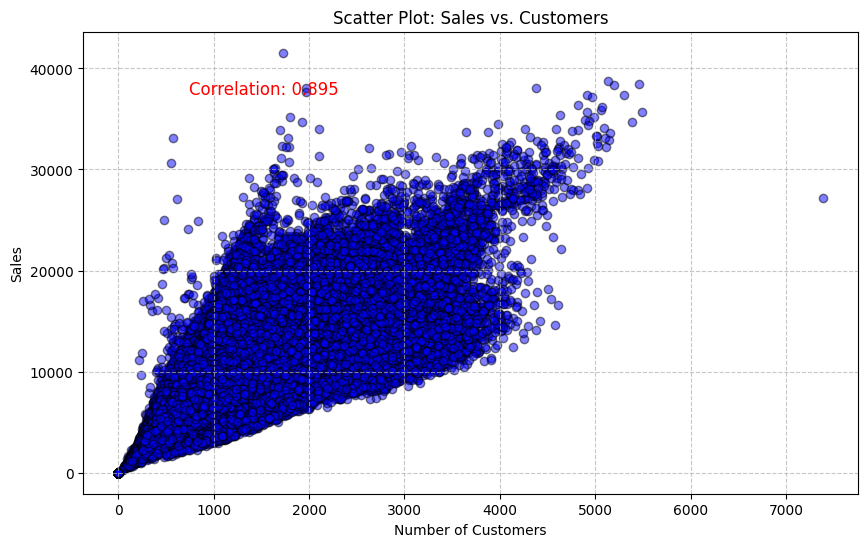

In [66]:
# Selecting the relevant columns from the train dataset
sales_customers_data = df_train[['Sales', 'Customers']]

# Dropping rows with missing values in the selected columns
sales_customers_data = sales_customers_data.dropna()

# Calculating the correlation between Sales and Customers
correlation = sales_customers_data.corr().loc['Sales', 'Customers']
print(f"Correlation between Sales and Customers: {correlation:.3f}")

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sales_customers_data['Customers'], sales_customers_data['Sales'], alpha=0.5, c='blue', edgecolors='k')
plt.title('Scatter Plot: Sales vs. Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.7)

# Adding correlation as text in the plot
plt.text(0.1 * sales_customers_data['Customers'].max(), 0.9 * sales_customers_data['Sales'].max(),
         f"Correlation: {correlation:.3f}", fontsize=12, color='red')

# Display the plot
plt.show()


The correlation between Sales and the number of Customers is approximately 0.895. This indicates a strong positive relationship: as the number of customers increases, sales tend to increase as well.

### Promo Effect on Sales

Average Sales with Promo: 7991.15
Average Sales without Promo: 4406.05
Average Customers with Promo: 820.10
Average Customers without Promo: 517.82
Sales Per Customer with Promo: 9.74
Sales Per Customer without Promo: 8.51


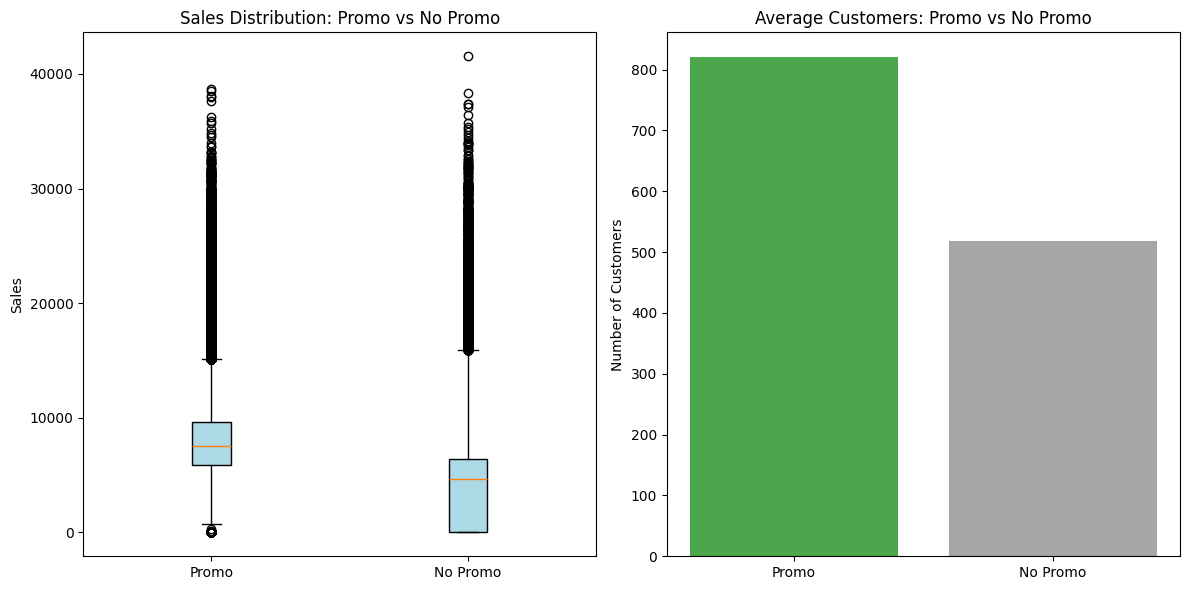

In [67]:
# Selecting relevant columns from the train dataset
promo_data = df_train[['Sales', 'Customers', 'Promo']]

# Dropping rows with missing values in the selected columns
promo_data = promo_data.dropna()

# 1. Comparing Sales During Promotions vs. No Promotions
sales_promo = promo_data[promo_data['Promo'] == 1]['Sales']
sales_no_promo = promo_data[promo_data['Promo'] == 0]['Sales']

avg_sales_promo = sales_promo.mean()
avg_sales_no_promo = sales_no_promo.mean()
print(f"Average Sales with Promo: {avg_sales_promo:.2f}")
print(f"Average Sales without Promo: {avg_sales_no_promo:.2f}")

# 2. Comparing Number of Customers During Promotions vs. No Promotions
customers_promo = promo_data[promo_data['Promo'] == 1]['Customers']
customers_no_promo = promo_data[promo_data['Promo'] == 0]['Customers']

avg_customers_promo = customers_promo.mean()
avg_customers_no_promo = customers_no_promo.mean()
print(f"Average Customers with Promo: {avg_customers_promo:.2f}")
print(f"Average Customers without Promo: {avg_customers_no_promo:.2f}")

# 3. Analyzing Sales Per Customer
sales_per_customer_promo = sales_promo.sum() / customers_promo.sum()
sales_per_customer_no_promo = sales_no_promo.sum() / customers_no_promo.sum()
print(f"Sales Per Customer with Promo: {sales_per_customer_promo:.2f}")
print(f"Sales Per Customer without Promo: {sales_per_customer_no_promo:.2f}")

# Visualization: Sales Comparison
plt.figure(figsize=(12, 6))

# Boxplot for Sales
plt.subplot(1, 2, 1)
plt.boxplot([sales_promo, sales_no_promo], labels=['Promo', 'No Promo'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Sales Distribution: Promo vs No Promo')
plt.ylabel('Sales')

# Bar chart for Customers
plt.subplot(1, 2, 2)
plt.bar(['Promo', 'No Promo'], [avg_customers_promo, avg_customers_no_promo], color=['green', 'gray'], alpha=0.7)
plt.title('Average Customers: Promo vs No Promo')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


### Most Effective Stores for Promotions:

Most Effective Stores for Promotions:
      Store  Avg_Sales_Promo  Avg_Sales_No_Promo  Avg_Customers_Promo  \
197     198      4211.216667         1292.500000           445.938889   
606     607      5435.191667         1880.798969           529.419444   
542     543      3817.008333         1383.443299           294.522222   
574     575      7294.339161         2664.858051           613.370629   
270     271     10507.675000         4009.890034           984.858333   
692     693      8854.822222         3390.144330           607.491667   
95       96      6891.002778         2675.621993           669.005556   
1107   1108      7640.116667         2976.214777           730.672222   
551     552     10272.252778         4008.190722           826.175000   
634     635      7847.163889         3065.690722           739.302778   

      Avg_Customers_No_Promo  Sales_Increase_Ratio  
197               178.955326              3.258195  
606               228.893471              2.889831  

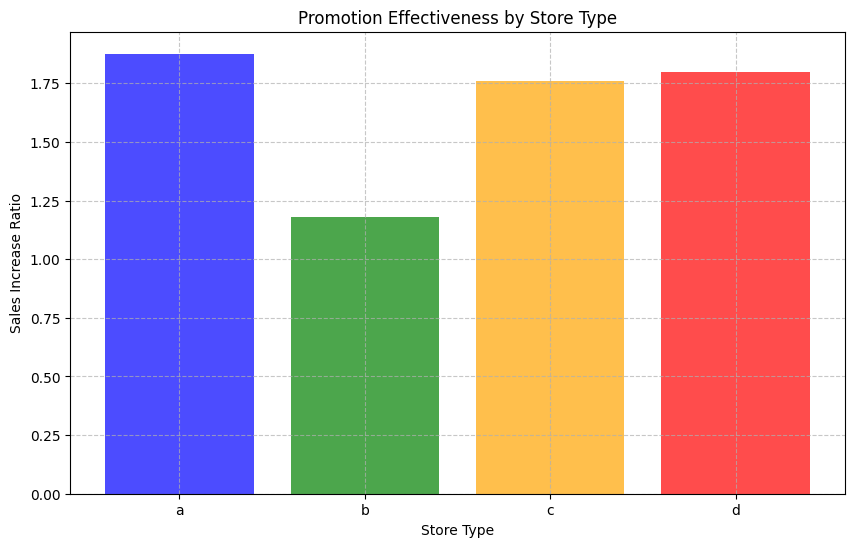

In [76]:
# Selecting relevant columns
promo_analysis_data = merged_data[['Store', 'Sales', 'Customers', 'Promo', 'StoreType', 'Assortment']]

# Dropping rows with missing values
promo_analysis_data = promo_analysis_data.dropna()

# Grouping by Store to analyze average sales during promotions vs. no promotions
store_promo_effectiveness = promo_analysis_data.groupby('Store').apply(
    lambda x: pd.Series({
        'Avg_Sales_Promo': x[x['Promo'] == 1]['Sales'].mean(),
        'Avg_Sales_No_Promo': x[x['Promo'] == 0]['Sales'].mean(),
        'Avg_Customers_Promo': x[x['Promo'] == 1]['Customers'].mean(),
        'Avg_Customers_No_Promo': x[x['Promo'] == 0]['Customers'].mean(),
    })
).reset_index()

# Calculating the effectiveness of promotions as a ratio
store_promo_effectiveness['Sales_Increase_Ratio'] = (
    store_promo_effectiveness['Avg_Sales_Promo'] / store_promo_effectiveness['Avg_Sales_No_Promo']
)

# Identifying stores where promotions are most and least effective
most_effective_stores = store_promo_effectiveness.nlargest(10, 'Sales_Increase_Ratio')
least_effective_stores = store_promo_effectiveness.nsmallest(10, 'Sales_Increase_Ratio')

# Printing top results
print("Most Effective Stores for Promotions:")
print(most_effective_stores)

print("\nLeast Effective Stores for Promotions:")
print(least_effective_stores)

# Visualization: Promotion Effectiveness Across Store Types
store_type_effectiveness = promo_analysis_data.groupby('StoreType').apply(
    lambda x: pd.Series({
        'Avg_Sales_Promo': x[x['Promo'] == 1]['Sales'].mean(),
        'Avg_Sales_No_Promo': x[x['Promo'] == 0]['Sales'].mean()
    })
).reset_index()

store_type_effectiveness['Sales_Increase_Ratio'] = (
    store_type_effectiveness['Avg_Sales_Promo'] / store_type_effectiveness['Avg_Sales_No_Promo']
)

plt.figure(figsize=(10, 6))
plt.bar(store_type_effectiveness['StoreType'], store_type_effectiveness['Sales_Increase_Ratio'],
        color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.title('Promotion Effectiveness by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales Increase Ratio')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Trends of customer behavior during store opening and closing times

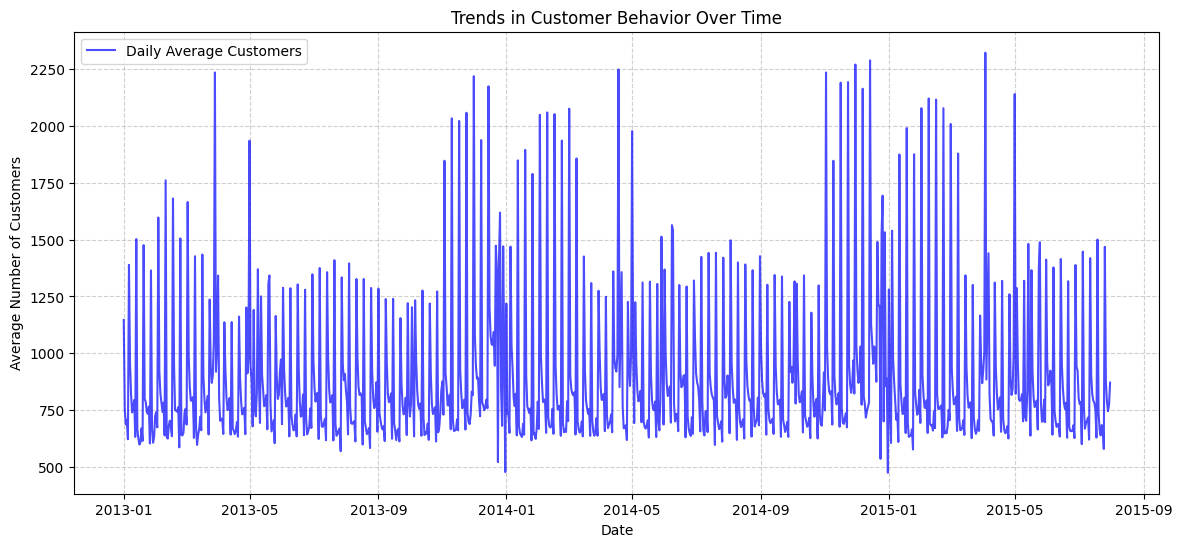

2025-01-04 22:34:39,320 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-04 22:34:39,322 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


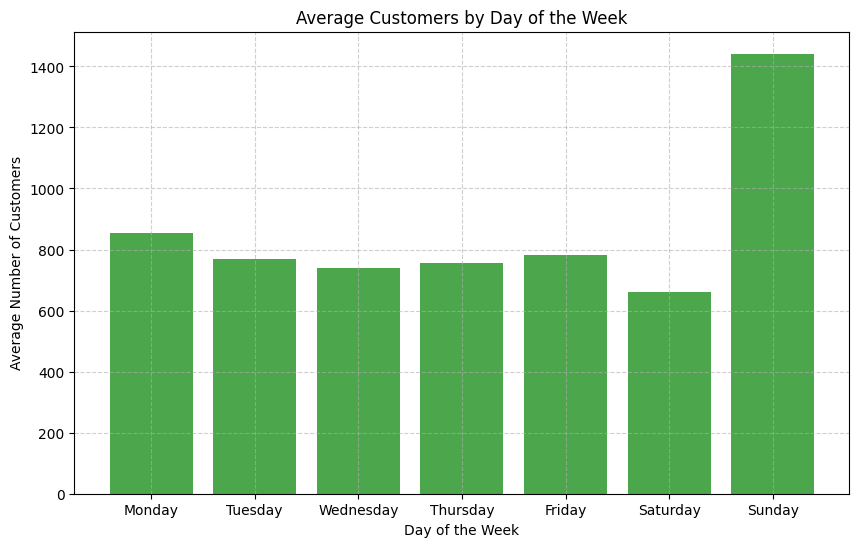

In [77]:
# Parsing the Date column for time-based analysis
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Day'] = df_train['Date'].dt.day_name()
df_train['Month'] = df_train['Date'].dt.month
df_train['Year'] = df_train['Date'].dt.year

# Ensure Sales and Customers columns are numeric, coercing errors to NaN
df_train['Sales'] = pd.to_numeric(df_train['Sales'], errors='coerce')
df_train['Customers'] = pd.to_numeric(df_train['Customers'], errors='coerce')

# Dropping rows with missing or invalid values
df_train = df_train.dropna(subset=['Sales', 'Customers'])

# Filtering for open stores
open_store_data = df_train[df_train['Open'] == 1]


# 3. Trends Over Time (Daily Customers)
daily_customer_trends = open_store_data.groupby('Date')['Customers'].mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_customer_trends.index, daily_customer_trends.values, color='blue', alpha=0.7, label='Daily Average Customers')
plt.title('Trends in Customer Behavior Over Time')
plt.xlabel('Date')
plt.ylabel('Average Number of Customers')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. Weekday vs. Weekend Behavior
weekday_trends = open_store_data.groupby('Day')['Customers'].mean()
weekday_trends = weekday_trends.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
plt.bar(weekday_trends.index, weekday_trends.values, color='green', alpha=0.7)
plt.title('Average Customers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Customers')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# 1. Customer Behavior on Opening Days (First Week of Store Opening)
store_opening_behavior = open_store_data.groupby('Store').apply(
    lambda x: x.sort_values('Date').head(7).mean()
)[['Customers']].reset_index()

print("Customer behavior during store opening days:")
print(store_opening_behavior.head(10))

# 2. Customer Behavior on Closing Days (Last Week Before Closure if Open=0 exists)
store_closing_behavior = df_train[df_train['Open'] == '0'].groupby('Store').apply(
    lambda x: x.sort_values('Date', ascending=False).head(7).mean()
)[['Customers']].reset_index()

print("Customer behavior during store closing days:")
print(store_closing_behavior.head(10))

### Which stores are open on all weekdays? How does that affect their sales on weekends?

Stores open on all weekdays: 1115
[   1    2    3 ... 1113 1114 1115]
Average weekend sales for stores open all weekdays:
   Store        Sales
0      1  2471.485075
1      2  1436.552239
2      3  2217.320896
3      4  5056.723881
4      5  1039.552239
5      6  1775.313433
6      7  3083.332090
7      8  1500.115672
8      9  3010.458955
9     10  2413.876866


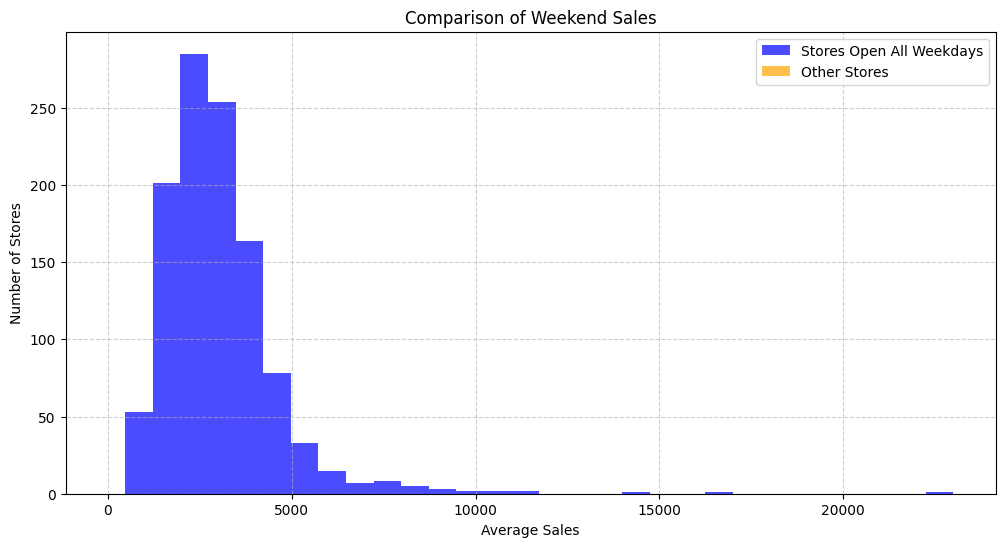

In [79]:
# Parsing the Date column for time-based analysis
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Day'] = df_train['Date'].dt.day_name()

# Ensure Sales and Customers columns are numeric, coercing errors to NaN
df_train['Sales'] = pd.to_numeric(df_train['Sales'], errors='coerce')
df_train['Customers'] = pd.to_numeric(df_train['Customers'], errors='coerce')

# Dropping rows with missing or invalid values
df_train = df_train.dropna(subset=['Sales', 'Customers'])

# 1. Identify stores open on all weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']

# Check if stores are open all weekdays
def is_open_all_weekdays(store_data):
    days_open = store_data[store_data['Open'] == 1]['Day'].unique()
    return all(day in days_open for day in weekdays)

stores_open_all_weekdays = df_train.groupby('Store').filter(is_open_all_weekdays)['Store'].unique()
print(f"Stores open on all weekdays: {len(stores_open_all_weekdays)}")
print(stores_open_all_weekdays)

# 2. Analyze weekend sales for these stores
weekend_sales = df_train[(df_train['Store'].isin(stores_open_all_weekdays)) & (df_train['Day'].isin(weekend))]
avg_weekend_sales = weekend_sales.groupby('Store')['Sales'].mean().reset_index()

print("Average weekend sales for stores open all weekdays:")
print(avg_weekend_sales.head(10))

# 3. Compare with stores not open all weekdays
non_weekday_stores = df_train[~df_train['Store'].isin(stores_open_all_weekdays) & (df_train['Day'].isin(weekend))]
avg_weekend_sales_non_weekday = non_weekday_stores.groupby('Store')['Sales'].mean().reset_index()

# Visualization: Weekend Sales Comparison
plt.figure(figsize=(12, 6))
plt.hist(avg_weekend_sales['Sales'], bins=30, alpha=0.7, label='Stores Open All Weekdays', color='blue')
plt.hist(avg_weekend_sales_non_weekday['Sales'], bins=30, alpha=0.7, label='Other Stores', color='orange')
plt.title('Comparison of Weekend Sales')
plt.xlabel('Average Sales')
plt.ylabel('Number of Stores')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Check how the assortment type affects sales

Average sales by assortment type:
  Assortment        Sales
1          b  8553.931999
2          c  6058.676567
0          a  5481.026096


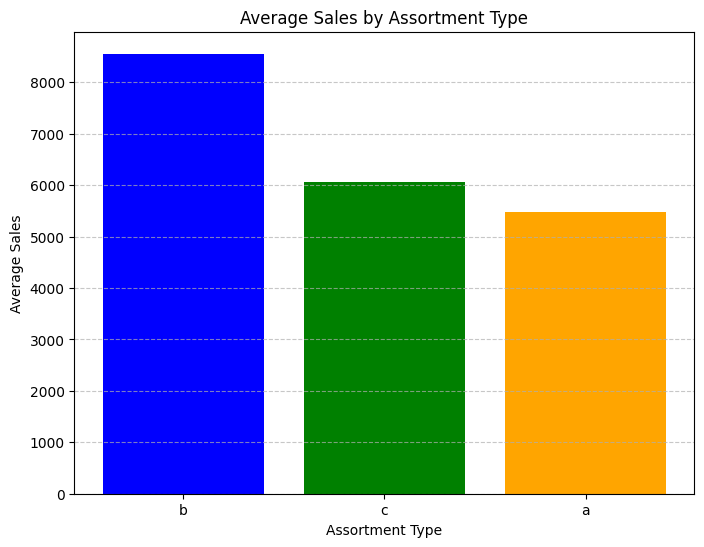

In [80]:
# Ensure Sales column is numeric, coercing errors to NaN
merged_data['Sales'] = pd.to_numeric(merged_data['Sales'], errors='coerce')

# Drop rows with missing or invalid values
merged_data = merged_data.dropna(subset=['Sales', 'Assortment'])

# Calculate average sales for each assortment type
assortment_sales = merged_data.groupby('Assortment')['Sales'].mean().reset_index()
assortment_sales = assortment_sales.sort_values(by='Sales', ascending=False)

print("Average sales by assortment type:")
print(assortment_sales)

# Visualization: Sales by Assortment Type
plt.figure(figsize=(8, 6))
plt.bar(assortment_sales['Assortment'], assortment_sales['Sales'], color=['blue', 'green', 'orange'])
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### How does the distance to the next competitor affect sales?

Correlation between CompetitionDistance and Sales: -0.02
Average sales by competition distance:
  DistanceBin        Sales
0      0-500m  6307.393560
1    500m-1km  5565.373637
2       1-5km  5675.492669
3      5-10km  5567.718124
4     10-20km  5573.341004
5       20km+  5937.308807


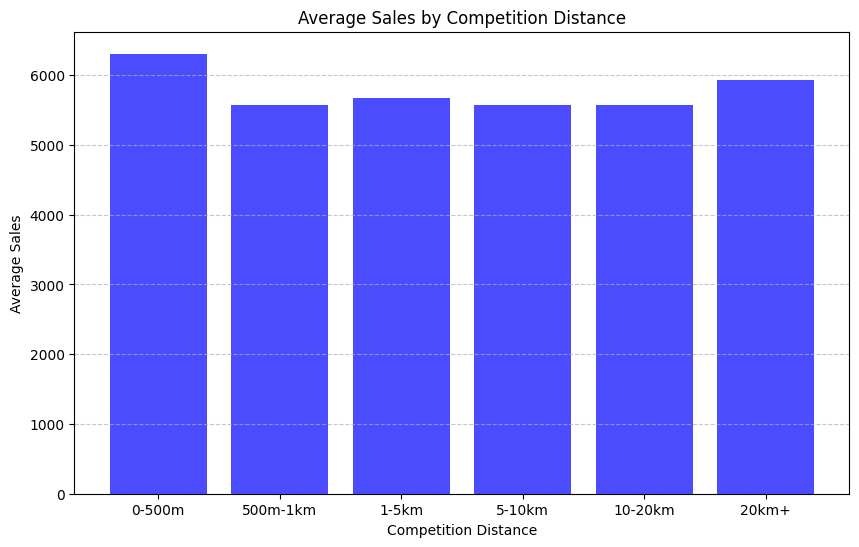

Average sales by competition distance (city centers):
  DistanceBin        Sales
0      0-500m  6307.393560
1    500m-1km  5565.373637
2       1-5km  5675.492669
3      5-10km  5567.718124
4     10-20km  5573.341004
5       20km+  5937.308807


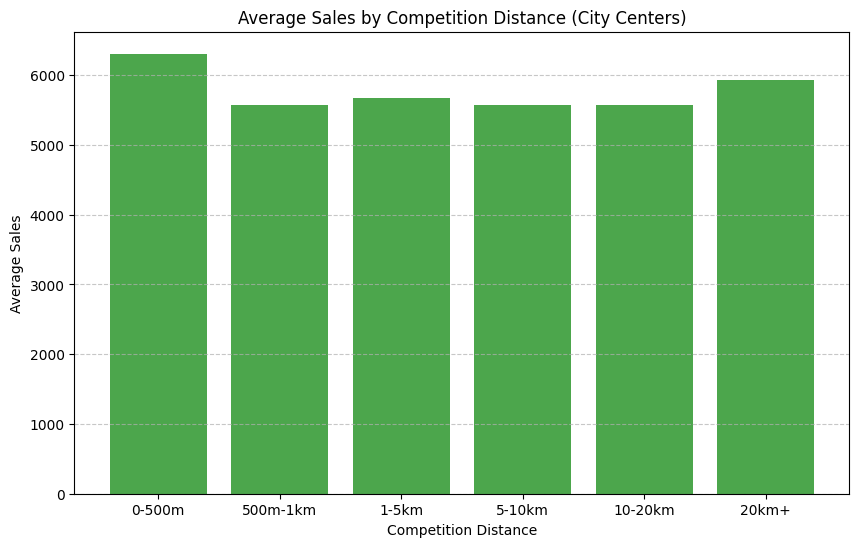

In [81]:
# Ensure Sales and CompetitionDistance columns are numeric, coercing errors to NaN
merged_data['Sales'] = pd.to_numeric(merged_data['Sales'], errors='coerce')
merged_data['CompetitionDistance'] = pd.to_numeric(merged_data['CompetitionDistance'], errors='coerce')

# Drop rows with missing or invalid values
merged_data = merged_data.dropna(subset=['Sales', 'CompetitionDistance'])

# 1. Analyze the relationship between CompetitionDistance and Sales
correlation = merged_data['Sales'].corr(merged_data['CompetitionDistance'])
print(f"Correlation between CompetitionDistance and Sales: {correlation:.2f}")

# Binning CompetitionDistance for better visualization
merged_data['DistanceBin'] = pd.cut(merged_data['CompetitionDistance'], bins=[0, 500, 1000, 5000, 10000, 20000, float('inf')], 
                                    labels=['0-500m', '500m-1km', '1-5km', '5-10km', '10-20km', '20km+'])

# Average sales for each distance bin
distance_sales = merged_data.groupby('DistanceBin')['Sales'].mean().reset_index()

print("Average sales by competition distance:")
print(distance_sales)

# Visualization: Sales by Distance Bin
plt.figure(figsize=(10, 6))
plt.bar(distance_sales['DistanceBin'], distance_sales['Sales'], color='blue', alpha=0.7)
plt.title('Average Sales by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Average sales for city center stores by distance bin
city_center_distance_sales = merged_data.groupby('DistanceBin')['Sales'].mean().reset_index()

print("Average sales by competition distance (city centers):")
print(city_center_distance_sales)

# Visualization: Sales by Distance Bin for City Centers
plt.figure(figsize=(10, 6))
plt.bar(city_center_distance_sales['DistanceBin'], city_center_distance_sales['Sales'], color='green', alpha=0.7)
plt.title('Average Sales by Competition Distance (City Centers)')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### How does the opening or reopening of new competitors affect stores?

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1016095      1          2 2013-01-01      0          0     0      0   
1016096      2          2 2013-01-01      0          0     0      0   
1016097      3          2 2013-01-01      0          0     0      0   
1016098      4          2 2013-01-01      0          0     0      0   
1016099      5          2 2013-01-01      0          0     0      0   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
1016095            a              1         c          a          

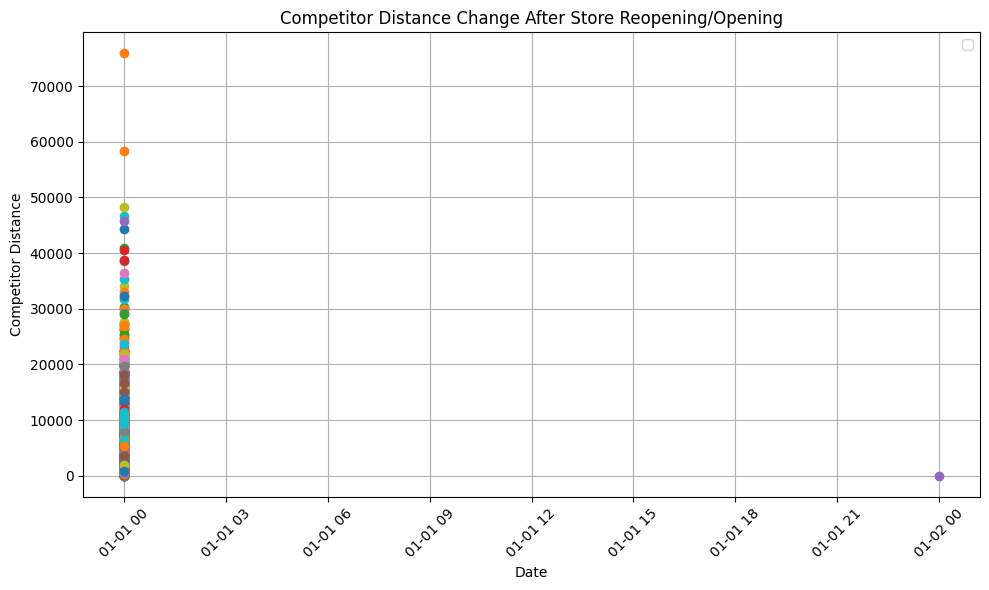

In [82]:
# Convert date column to datetime type for easier analysis
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Sort the data by store_id and date to analyze sequential updates
merged_data.sort_values(by=['Store', 'Date'], inplace=True)

# Check for stores that had NA competitor_distance but later had a non-NA value
merged_data['previous_competitor_distance'] = merged_data.groupby('Store')['CompetitionDistance'].shift(1)

# Filter for stores that had NA competitor distance previously and now have a value
affected_stores = merged_data[merged_data['previous_competitor_distance'].isna() & merged_data['CompetitionDistance'].notna()]

# Display the stores with reopening or new competitors
print(affected_stores)

# Plot the affected stores
plt.figure(figsize=(10, 6))

# Plotting the affected stores with competitor distance change
for store_id in affected_stores['Store'].unique():
    store_data = affected_stores[affected_stores['Store'] == store_id]
    plt.plot(store_data['Date'], store_data['CompetitionDistance'], marker='o')

# Formatting the plot
plt.title('Competitor Distance Change After Store Reopening/Opening')
plt.xlabel('Date')
plt.ylabel('Competitor Distance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Task 1.2 # Logging

In [83]:
logging.info("Completed Interim Activities")


2025-01-04 22:37:18,787 - INFO - Completed Interim Activities
